# PGA Study
    
This is a first study on PGA index file, a data set released by source{d}.

In [133]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

style.use('seaborn')

df = pd.read_csv('pga_index.csv', low_memory=False)

### Start taking a look on PGA index

We'll use Pandas framework to describe and manipulate (at least initially) PGA index (that comes on csv format)

In [134]:
df.describe(include=['O'])

,URL,SIVA_FILENAMES,FILE_COUNT,LANGS,LANGS_BYTE_COUNT,LANGS_LINES_COUNT,LANGS_FILES_COUNT,COMMITS_COUNT,BRANCHES_COUNT,EMPTY_LINES_COUNT,CODE_LINES_COUNT,COMMENT_LINES_COUNT,LICENSE
count,181482,181482,181482,181369,181369,181369,181369,181482,181482,181369,181369,181369,130644
unique,181482,170829,5658,65087,174402,171043,115701,6847,2667,158906,165933,113037,5281
top,https://github.com/davmac314/dasynq,c24f3c3f9914ca8fc946e7129acd5fa50c16c65f.siva,9,Markdown,170,2,1,5,2,0,2,0,MIT:0.988
freq,1,31,3050,5168,12,196,3603,1985,19638,629,310,5460,37003


### How does the dataset look like?

Let's take a look at the first 5 rows

In [135]:
df.head()

,URL,SIVA_FILENAMES,FILE_COUNT,LANGS,LANGS_BYTE_COUNT,LANGS_LINES_COUNT,LANGS_FILES_COUNT,COMMITS_COUNT,BRANCHES_COUNT,FORK_COUNT,EMPTY_LINES_COUNT,CODE_LINES_COUNT,COMMENT_LINES_COUNT,LICENSE
0,https://github.com/powmedia/buildify,4a14cc02da0a9280538cd3f3242365601d72f241.siva,12,"JSON,JavaScript,Markdown,Text","653,18611,4669,1094","29,849,216,22","1,5,1,4",38,25,0,"0,190,67,0","28,474,148,0","0,161,0,0",MIT:0.981
1,https://github.com/leon/play-salat,ee02fdfc0942ff17949f456d6ee3a27b976b7141.siva,53,"CSS,HTML,INI,Markdown,Scala,YAML","12981,692,38,12388,34281,132","114,30,4,343,1056,16","1,3,2,19,19,1",104,74,0,"0,4,0,79,156,4","113,25,0,248,766,11","0,0,0,0,102,0",Apache-2.0:1.000
2,https://github.com/adammark/Markup.js,00e71912d4ec215337d5d959a34ab0ce44fdd3b4.siva,22,"CSS,HTML,JSON,JavaScript,Markdown,Shell","6537,11414,678,182203,30807,91","83,492,30,5600,1204,5","1,2,1,13,1,1",295,30,0,"2,91,0,857,347,0","80,395,29,3726,857,0","0,4,0,1008,0,0",MIT:0.870
3,https://github.com/heroku/heroku-buildpack-scala,eb7aa1e50236c65bf44529ebb9a75fae68e1d6b0.siva,33,"JSON,Markdown,Ruby,Scala,Shell,Text,YAML","585,5528,6850,494,69595,1070,711","23,160,229,22,2425,10,32","1,2,5,2,18,1,2",560,206,0,"0,58,19,2,0,0,1","22,100,112,18,0,0,29","0,0,8,0,0,0,0",MIT:0.994
4,https://github.com/brandonwamboldt/utilphp,"993cc5b5ca2603f06a82555df151fbb398114543.siva,...",12,"JSON,Markdown,PHP,XML,YAML","723,13409,157618,714,342","25,337,3986,26,23","1,5,3,1,1",267,112,0,"0,91,548,0,4","24,242,2505,0,18","0,0,930,0,0",MIT:0.965


### Create a new dataframe only with repos that have a Jupyter Notebook

In [136]:
language_name='Jupyter Notebook'
jupyter_df = df[df['LANGS'].str.contains(language_name) == True]

### Add a column with the repo's language count

In [137]:
langs_count = []

for row in range(len(jupyter_df)):
    langs_count.append(int(jupyter_df.iloc[row]['LANGS'].count(',')+1))

jupyter_df = jupyter_df.assign(LANGS_COUNT = langs_count)

### Taking a look on language distribution

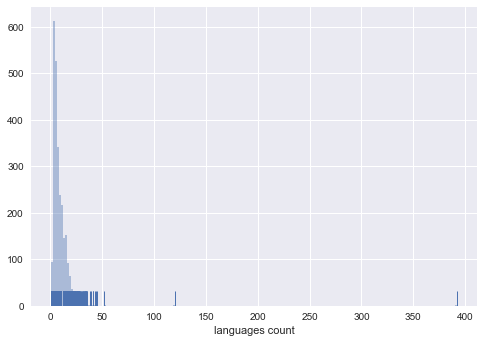

In [138]:
sns.distplot(jupyter_df['LANGS_COUNT'], bins=200, kde=False, rug=True, hist=True, axlabel="languages count")

It looks nice, but can be better.
We can see that there is a great distribution for repos with < 50 languages, and outliers over 100 languages. Let's look who are these outliers.

In [139]:
jupyter_df[['URL', 'LANGS_COUNT']].sort_values(by='LANGS_COUNT', ascending=False).head(20)

,URL,LANGS_COUNT
4802,https://github.com/github/linguist,392
171604,https://github.com/cloudera/hue,120
173567,https://github.com/root-mirror/root,52
167869,https://github.com/OpenGenus/cosmos,45
181086,https://github.com/d-ronin/dRonin,44
175438,https://github.com/pyparallel/pyparallel,43
177763,https://github.com/jivoi/junk,41
178680,https://github.com/truongkma/ctf-tools,41
173689,https://github.com/lammps/lammps,39
129633,https://github.com/hola/challenge_word_classifier,38


We can see that there are only two repos with over 100 languages, and the rest apparently has an interesting distribution under 50 languages.

Let's take a look at language distribution without the outliers, to focus on the repos with less than 50 langs.

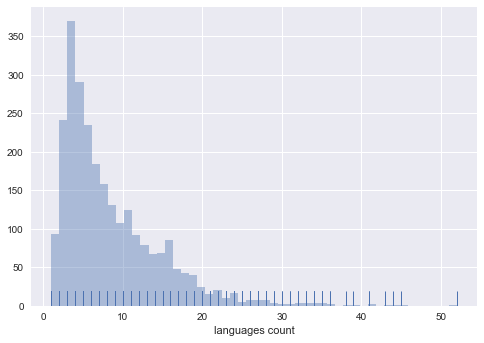

In [140]:
sns.distplot((jupyter_df[jupyter_df.LANGS_COUNT < 100]['LANGS_COUNT']), bins=50, kde=False, rug=True, hist=True, axlabel="languages count")

### Checking position of Jupyter Notebook

Now we'll check the position of Jupyter Notebooks in `LANGS` column, to study further Jupyter stats in comparison with other languages.

This will be useful to study how Jupyter files relate to other language files for the fields:
`LANGS_BYTE_COUNT`, `LANGS_LINE_COUNT`, `LANGS_FILE_COUNT`, `EMPTY_LINES_COUNT`, `CODE_LINES_COUNT`, `COMMENT_LINES_COUNT`

Below we will create lists with the fractions of Jupyter Notebook data over the same number summer over all the languages

In [141]:
frac_langs_byte_count = []
frac_langs_line_count = []
frac_langs_file_count = []
frac_empty_lines_count = []
frac_code_lines_count = []
frac_comment_lines_count = []

for row in range(len(jupyter_df)):
    
    row_str = str(jupyter_df.iloc[row].at['LANGS'])
    row_list = row_str.split(',')
    position = row_list.index('Jupyter Notebook')
    
    langs_byte_count = str(jupyter_df.iloc[row].at['LANGS_BYTE_COUNT']).split(',')
    langs_byte_count = [int(x) for x in langs_byte_count]
    langs_byte_count_jupyter = langs_byte_count[position]
    if sum(langs_byte_count) != 0:
        frac_langs_byte_count.append(round(langs_byte_count_jupyter/sum(langs_byte_count), 6))
    else:
        frac_langs_byte_count.append(0)
        
    langs_line_count = str(jupyter_df.iloc[row].at['LANGS_LINES_COUNT']).split(',')
    langs_line_count = [int(x) for x in langs_line_count]
    langs_line_count_jupyter = langs_line_count[position]
    if sum(langs_line_count) != 0:
        frac_langs_line_count.append(round(langs_line_count_jupyter/sum(langs_line_count), 6))
    else:
        frac_langs_line_count.append(0)
    
    langs_file_count = str(jupyter_df.iloc[row].at['LANGS_FILES_COUNT']).split(',')
    langs_file_count = [int(x) for x in langs_file_count]
    langs_file_count_jupyter = langs_file_count[position]
    if sum(langs_file_count) != 0:
        frac_langs_file_count.append(round(langs_file_count_jupyter/sum(langs_file_count), 6))
    else:
        frac_langs_file_count.append(0)
    
    empty_lines_count = str(jupyter_df.iloc[row].at['EMPTY_LINES_COUNT']).split(',')
    empty_lines_count = [int(x) for x in empty_lines_count]
    empty_lines_count_jupyter = empty_lines_count[position]
    if sum(empty_lines_count) != 0:
        frac_empty_lines_count.append(round(empty_lines_count_jupyter/sum(empty_lines_count), 6))
    else:
        frac_empty_lines_count.append(0)
    
    code_lines_count = str(jupyter_df.iloc[row].at['CODE_LINES_COUNT']).split(',')
    code_lines_count = [int(x) for x in code_lines_count]
    code_lines_count_jupyter = code_lines_count[position]
    if sum(code_lines_count) != 0:
        frac_code_lines_count.append(round(code_lines_count_jupyter/sum(code_lines_count), 6))
    else:
        frac_code_lines_count.append(0)
    
    comment_lines_count = str(jupyter_df.iloc[row].at['COMMENT_LINES_COUNT']).split(',')
    comment_lines_count = [int(x) for x in comment_lines_count]
    comment_lines_count_jupyter = comment_lines_count[position]
    if sum(comment_lines_count) != 0:
        frac_comment_lines_count.append(round(comment_lines_count_jupyter/sum(comment_lines_count), 6))
    else:
        frac_comment_lines_count.append(0)

In [142]:
jupyter_df = jupyter_df.assign(FRAC_LANGS_BYTE_COUNT = frac_langs_byte_count)
jupyter_df = jupyter_df.assign(FRAC_LANGS_LINE_COUNT = frac_langs_line_count)
jupyter_df = jupyter_df.assign(FRAC_LANGS_FILE_COUNT = frac_langs_file_count)
jupyter_df = jupyter_df.assign(FRAC_EMPTY_LINES_COUNT = frac_empty_lines_count)
jupyter_df = jupyter_df.assign(FRAC_CODE_LINES_COUNT = frac_code_lines_count)
jupyter_df = jupyter_df.assign(FRAC_COMMENT_LINES_COUNT = frac_comment_lines_count)

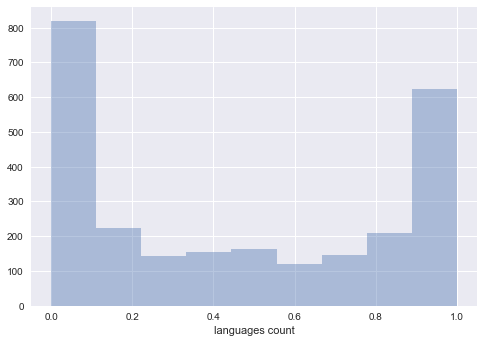

In [143]:
sns.distplot((jupyter_df['FRAC_LANGS_BYTE_COUNT']), kde=False, rug=False, hist=True, axlabel="languages count")

# just one line

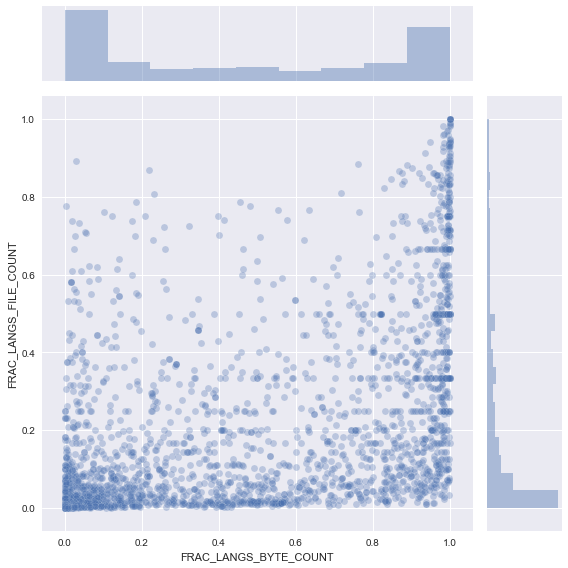

In [144]:
langs_lines = jupyter_df[jupyter_df.LANGS_COUNT < 100]['FRAC_LANGS_LINE_COUNT']
langs_files = jupyter_df[jupyter_df.LANGS_COUNT < 100]['FRAC_LANGS_FILE_COUNT']
langs_bytes = jupyter_df[jupyter_df.LANGS_COUNT < 100]['FRAC_LANGS_BYTE_COUNT']
empty_lines = jupyter_df[jupyter_df.LANGS_COUNT < 100]['FRAC_EMPTY_LINES_COUNT']
code_lines = jupyter_df[jupyter_df.LANGS_COUNT < 100]['FRAC_CODE_LINES_COUNT']
comment_lines = jupyter_df[jupyter_df.LANGS_COUNT < 100]['FRAC_COMMENT_LINES_COUNT']
langs = jupyter_df[jupyter_df.LANGS_COUNT < 100]['LANGS_COUNT']

sns.jointplot(x = langs_bytes, y = langs_files, kind='scatter', height=8, edgecolor="white", alpha=0.3)